In [34]:
from math import sin, cos, log, ceil 
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [35]:
g = 9.8
v_t = 30.0
C_D = 1/40
C_L = 1

v0 = v_t
theta0 = 0
x0 = 0
y0 =1000

In [36]:
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                        -g*cos(theta)/v +g/v_t**2*v,
                        v*cos(theta),
                        v*sin(theta)])

In [37]:
def euler_step(u, f, dt):
    return u +dt *f(u)

In [38]:
T = 100.
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0,T,N)

u = numpy.empty((N,4))
u[0] = numpy.array([v0,theta0,x0,y0])

for n in range(N-1):
    u[n+1]=euler_step(u[n],f,dt)

In [55]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

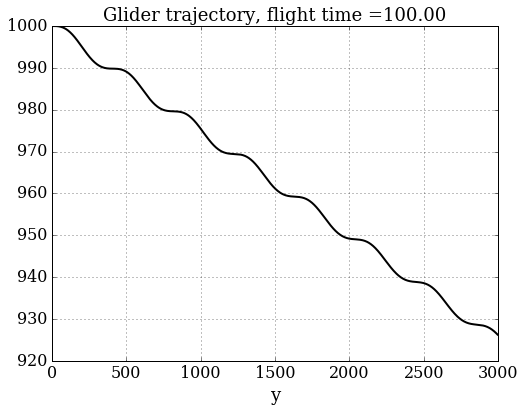

In [52]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize=18)
pyplot.xlabel(r'y',fontsize=18)
pyplot.title('Glider trajectory, flight time =%.2f' %T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2)

In [60]:
dt_values = numpy.array([0.1,0.05,0.01,0.05,0.001])
u_values = numpy.empty_like(dt_values,dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1
    t = numpy.linspace(0.0,T,N)
    
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0,theta0,x0,y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n],f,dt)
        
    u_values[i]=u

In [61]:
def get_diffgrid(u_current, u_fine, dt):
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt*numpy.sum(numpy.abs(\
                u_current[:,2] - u_fine[::grid_size_ratio,2]))
    return diffgrid

In [62]:
diffgrid = numpy.empty_like(dt_values)

for i,dt in enumerate(dt_values):
    print('dt={}'.format(dt))
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1],dt)

dt=0.1
dt=0.05
dt=0.01
dt=0.05
dt=0.001


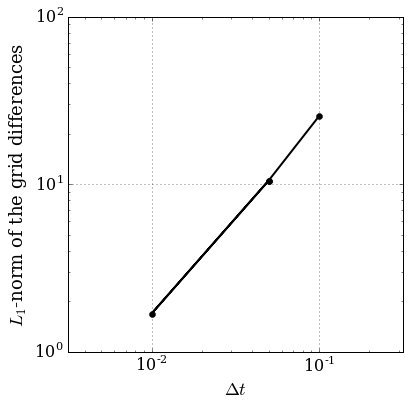

In [63]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

In [64]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   
    
    t = numpy.linspace(0.0, T, N)
    
 
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    for n in range(N-1):

        u[n+1] = euler_step(u[n], f, dt)        
    

    u_values2[i] = u
    


diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])


diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])


p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = 1.014
